In [1]:
import tweepy
import json
from time import sleep
import pickle
import re
from os import listdir
from os.path import isfile, join
import sys
import math

# configuration

In [2]:
config = {}
path = 'C:\\Users\\chenwang\\Documents\\courses\\FA16\CS597\\twitterMining\\'
initialSet_path = 'C:\\Users\\chenwang\\Documents\\courses\\FA16\\CS597\\twitterMining\\InitialSet\\Football\\location\\'

config['KEYS'] = {'consumer_key': ['mVJcyNN5qFyk7GdBJvENVc329', 'anqjETSjwaDqA9LBt0MGwub60','vDnzvZFFwXFgI2ftQxYWV2XZo',
                                  'sAkNaJxJWgPilhidaNJ48kmCo','tO2Bzbkexyf57LSF6aJwACXfs'],
                  'consumer_secret': ['DbXUXB7EN77HmzQahobHeTPSWgcNI9t8kKzDoe5twfTORnjXxf',\
                                       'AGTAiJhOrb2gPSbW1F5Rclu0Ns7pTZthPhJ3i7ySFNWwdheqim',\
                                     '5HxLPob3kGqgauc5HuNszFw0uoLjsK3JHD0IqUNEVbNAIVdRKQ',\
                                      'dPcVmoYaEGhsWC5djrEFsjfNdO8DmFecmSnBRjL63y0Sg9pCtl',
                                     'OIEIE1Pu01eTieDffG13kJM78spAPHZtKk2IZ1yGkU0eoKvVxn'],
                  'access_token': ['707770026573561856-Vfqm0iXrsBvFL2prQMQ2Gzu9eawWYIj',\
                                    '707770026573561856-diXgIsR0UCYM3CHYCUoU38hcp8Qk8Pj',\
                                  '707770026573561856-9BcLFzjLrkVdxeG0Z3dmqYhsCDqUQ2t',\
                                  '707770026573561856-Sua2gUtlWTxTik70a0dUba0SvayeQgU',\
                                  '707770026573561856-Oi1nNb4Ih0SJyizIwToY3PhjLymGkcl'],
                  'access_token_secret': ['HSMqS4YkDBcB6mm9JL3vd6VeKlkKmNdMxmJ0inJQwNhXS',\
                                           'GnqrY0AoeOuK7cgaF2yRBmcJGcc814bBIONMREN8gU7xu',\
                                         'e2OfQnQGnweLygFxJRFCUa9PZhOZXyCcaEipMpnlmABqj',\
                                         'Stj2TQtwsrTQFkdronpZDUyrl9g3slZjEMxgIYznbmSzy',\
                                         'Cp3d4xKdTfPyJq6y7uLeRLv77kTjZmEIpGYtiWrrqvK6i']
                 }
''
# later add {if it's not exist then write, otherwise skip}
with open(path + "CONFIG_PATH.pickle", 'wb+') as f:
        pickle.dump(config, f)

In [3]:
consumer_key = config['KEYS']['consumer_key']    # list
consumer_secret = config['KEYS']['consumer_secret']
access_token = config['KEYS']['access_token']
access_token_secret = config['KEYS']['access_token_secret']

# set stream

In [ ]:
class MyStreamListener(tweepy.StreamListener):

    def __init__(self, api = None):
        self.api = api or API()
        self.counter = 0
        self.info = []

    def on_data(self, data):
       
        if data != None:
            #status = json.loads(data)
            #print(data)
            self.on_status(data)
        else:
            #print('not ok')
            return 
    
    def on_error(self, status):
        print(status)

    def on_status(self, data):
        #print(status)
        status = json.loads(data)
        if status['user']['location'] != None: 
            if status['user']['location'].lower().find('chicago') != -1:
                print(status['user']['location'])

                self.info.append(status)
                self.counter += 1

                if self.counter >= 10:
                    with open(initialSet_path + 'stream'+str(self.counter)+'.json','w') as f:
                        json.dump(self.info,f)
                    sys.exit()
            
        return

    def on_timeout(self):
        print("Timeout, sleeping for 60 seconds...\n")
        time.sleep(60)
        return 

# get initial set

In [ ]:
auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])

In [ ]:
def collect_tweets(topic):
    
    stream = tweepy.Stream(auth, MyStreamListener(api))
    stream.filter(track=topic, languages = ['en'])   
        
    return None

# test block 
print out the user tweets and location 

In [49]:
def test_block(path):
    
    filenames = [f for f in listdir(path) if isfile(join(path, f))]
    football_tw = []
    for filename in filenames:    
        
        with open(path + filename,'r') as f:
            football_tw += json.load(f)
    i = 0
    for item in football_tw:
        print('list id:', i)   # in order to mannually delete this irrelevant tweets
        print('userID:',item['user']['screen_name'])
        print('text:', item['text'])
        print('location:', item['user']['location'])
        print('\n')
        i += 1
   
    return football_tw

football_tweets = test_block(initialSet_path)

In [ ]:
with open(initialSet_path + 'initial_list.pickle','rb') as f:
        initial_list = pickle.load(f)

In [ ]:
len(initial_list)

# query API to find their representative list

In [ ]:
auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [ ]:
rep_path = initialSet_path+'\\rep\\'

# get the detail of a id

In [ ]:
def get_screen_name(id_list):
    
    info = []
    for id in id_list:
        info.append(api.get_user(id))
        
    return info

# find the complete followers of the representative nodes

In [ ]:
with open(initialSet_path + 'represent_id.pickle','rb') as f:
    represent_id = pickle.load(f)

In [ ]:
ff_path = 'C:\\Users\\chenwang\\Documents\\courses\\FA16\\CS597\\twitterMining\\InitialSet\\Football\\location\\ff_of_rep\\'

In [6]:
auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [5]:
auth = tweepy.OAuthHandler(consumer_key[1], consumer_secret[1])
auth.set_access_token(access_token[1], access_token_secret[1])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [ ]:
auth = tweepy.OAuthHandler(consumer_key[2], consumer_secret[2])
auth.set_access_token(access_token[2], access_token_secret[2])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [ ]:
auth = tweepy.OAuthHandler(consumer_key[3], consumer_secret[3])
auth.set_access_token(access_token[3], access_token_secret[3])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [ ]:
auth = tweepy.OAuthHandler(consumer_key[4], consumer_secret[4])
auth.set_access_token(access_token[4], access_token_secret[4])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [ ]:
for ID in represent_id[90:100]:
    with open(ff_path + str(ID) +'.pickle','wb+') as f:
        pickle.dump(api.followers_ids(str(ID)),f)

# test whether the ranking predictive model works

<p>seperate them into groups: baseline(twitter stream), every 300? </p>
<p>we should see there is a decline in matching accuracy in the two aspects: eg.football + chicago </p>

<p> 1. chicago </p>
<b> ratio = # user from chicago / # number of user provide their location </b>



In [19]:
# a bag of pre-defined locations that represent chicago

chicago = ['chicago','Arlington Heights', 'Aurora', 'Berwyn', 'Bolingbrook', 'Cicero','Des Plaines', 'Elgin','Evanston', 'Gary', 'Hammond',
           'Hoffman Estates', 'Joliet', 'Kenosha', 'Mount Prospect','Naperville', 'Oak Lawn', 'Oak Park', 'Orland Park',
           'Palatine', 'Schaumburg','Skokie','Tinley Park','Waukegan','Wheaton'] #,', IL','Illinois']

In [25]:
with open(initialSet_path + 'ranked_candidate_id.pickle','rb') as f:
    candidate_id = pickle.load(f)
#candidate_id[9050:9100]

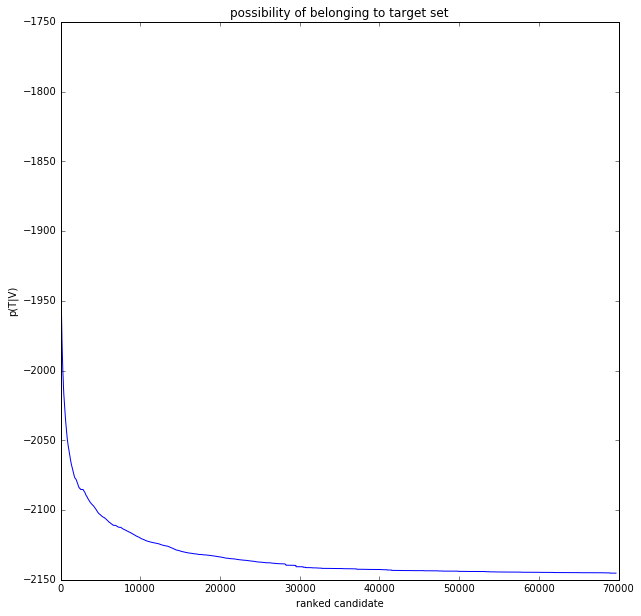

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(len(candidate_id))
y = [c[1] for c in candidate_id]

fig, axes = plt.subplots(figsize=(10,10))

axes.plot(x,y)
axes.set_xlabel('ranked candidate')
axes.set_ylabel('p(T|V)')
axes.set_title('possibility of belonging to target set')
#axes.set_ylim([1,40])
#axes.set_xlim([0,30000])

plt.show()

In [9]:
def gather_location(candidate_id):
    
    try:
        location = api.get_user(str(candidate_id)).location
        
        if location == '':
            location = 'NaN'
        
        return location
    
    except:
        print('error')
        pass
    
        return 'NaN'

In [47]:
for c in candidate_id[8700:9600]:
    location.append(gather_location(c[0]))

error
error


In [42]:
def print_ratio(location,area_list, interval):
    ratio = []
    for i in range(math.floor(len(location)/interval)):
    # for i in range(1):
        print(interval*(i), '~', interval*(i+1))
        
        target_count = 0
        general_count = 0
        
        for loc in location[interval*(i): interval*(i+1)]:
            if loc != 'NaN' and loc != None:
                general_count += 1
                #print('g',general_count,loc)
            
            flag = False
            for area in area_list:
                if loc.lower().find(area.lower()) != -1:
                    flag = True
            
            if flag == True:
                target_count += 1
                #print('t',target_count,loc)

        ratio.append(target_count / general_count)
        print("# of people from chicago : ", target_count)
        print("# of people provide location : ", general_count)
        # print("# of people from chicago/ # of people provide location :", ratio, '\n')

    return ratio

In [45]:
ratio = print_ratio(location,chicago,interval = 100)

0 ~ 100
# of people from chicago :  29
# of people provide location :  65
100 ~ 200
# of people from chicago :  21
# of people provide location :  58
200 ~ 300
# of people from chicago :  18
# of people provide location :  53
300 ~ 400
# of people from chicago :  22
# of people provide location :  58
400 ~ 500
# of people from chicago :  20
# of people provide location :  52
500 ~ 600
# of people from chicago :  25
# of people provide location :  50
600 ~ 700
# of people from chicago :  20
# of people provide location :  55
700 ~ 800
# of people from chicago :  24
# of people provide location :  56
800 ~ 900
# of people from chicago :  20
# of people provide location :  64
900 ~ 1000
# of people from chicago :  15
# of people provide location :  58
1000 ~ 1100
# of people from chicago :  21
# of people provide location :  57
1100 ~ 1200
# of people from chicago :  15
# of people provide location :  57
1200 ~ 1300
# of people from chicago :  12
# of people provide location :  40
1300 ~ 

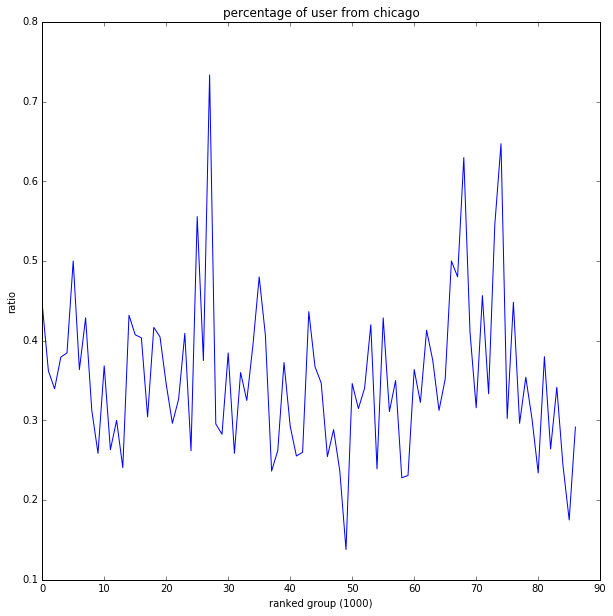

In [46]:
x = range(len(ratio))
y = ratio

fig, axes = plt.subplots(figsize=(10,10))

axes.plot(x,y)
axes.set_xlabel('ranked group (1000)')
axes.set_ylabel('ratio')
axes.set_title('percentage of user from chicago')
#axes.set_ylim([1,40])
#axes.set_xlim([0,30000])

plt.show()

In [ ]:
# set stream
rand_path = 'C:\\Users\\chenwang\\Documents\\courses\\FA16\\CS597\\twitterMining\\RandSet\\'

class MyStreamListener(tweepy.StreamListener):

    def __init__(self, api = None):
        self.api = api or API()
        self.counter = 0
        self.info = []

    def on_data(self, data):
       
        if data != None:
            #status = json.loads(data)
            #print(data)
            self.on_status(data)
        else:
            #print('not ok')
            return 
    
    def on_error(self, status):
        print(status)

    def on_status(self, data):
        #print(status)
        status = json.loads(data)
        
        # those user who provide location information
        if status['user']['location'] != None: 
            #print(status['user']['location'])
            self.info.append(status)
            self.counter += 1
            
            if self.counter >= 100:
                with open(rand_path + 'stream'+str(self.counter)+'.json','w') as f:
                    json.dump(self.info,f)
                sys.exit()
            
        return

    def on_timeout(self):
        print("Timeout, sleeping for 60 seconds...\n")
        time.sleep(60)
        return 

In [ ]:
auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

In [ ]:
def rand_tweets():
    
    stream = tweepy.Stream(auth, MyStreamListener(api))
    stream.filter(track=["a", "the", "i", "you","it","of"], languages = ['en'])   
        
    return None

In [ ]:
collect_tweets(['a','the','of'])

# random test area

In [ ]:
#api.get_user('786326788246999040')